### Zomato Restaurant

#### Project Description  

Zomato Data Analysis is one of the most useful analysis for foodies who want to taste the best
cuisines of every part of the world which lies in their budget. This analysis is also for those who
want to find the value for money restaurants in various parts of the country for the cuisines.
Additionally, this analysis caters the needs of people who are striving to get the best cuisine of
the country and which locality of that country serves that cuisines with maximum number of
restaurants.

#### Data Storage:
This problem statement contains two datasets- Zomato.csv and country_code.csv.  
Country_code.csv contains two variables:  
• Country code  
• Country name  

The collected data has been stored in the Comma Separated Value file Zomato.csv. Each restaurant in the dataset is uniquely identified by its Restaurant Id. Every Restaurant contains the following variables:  
• Restaurant Id: Unique id of every restaurant across various cities of the world  
• Restaurant Name: Name of the restaurant  
• Country Code: Country in which restaurant is located  
• City: City in which restaurant is located  
• Address: Address of the restaurant  
• Locality: Location in the city  
• Locality Verbose: Detailed description of the locality  
• Longitude: Longitude coordinate of the restaurants location  
• Latitude: Latitude coordinate of the restaurants location  
• Cuisines: Cuisines offered by the restaurant  
• Average Cost for two: Cost for two people in different currencies ��  
• Currency: Currency of the country  
• Has Table booking: yes/no  
• Has Online delivery: yes/ no  
• Is delivering: yes/ no  
• Switch to order menu: yes/no  
• Price range: range of price of food  
• Aggregate Rating: Average rating out of 5  
• Rating color: depending upon the average rating color  
• Rating text: text on the basis of rating of rating  
• Votes: Number of ratings casted by people  
  
#### Problem statement :     
In this dataset predict 2 things –    
1) Average Cost for two  
2) Price range  


Hint : Use pandas merge operation -- pd.merge (df1,df2) to combine two datasets


#### Dataset Link-  
•	https://github.com/dsrscientist/dataset4/blob/main/Country-Code.xlsx  
•	https://github.com/dsrscientist/dataset4/blob/main/zomato.csv



In [296]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

### Data Gathering

In [297]:
#importing first data set
data1=pd.read_excel(r'https://github.com/dsrscientist/dataset4/raw/main/Country-Code.xlsx')

data1.head()

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia


In [298]:
#importing Second data set
data2=pd.read_csv(r'https://raw.githubusercontent.com/dsrscientist/dataset4/main/zomato.csv', encoding="ISO-8859-1")
data2.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


### Data Pre-processing

In [299]:
data1.shape

(15, 2)

#### Rows : 15, Columns : 2

In [300]:
data2.shape

(9551, 21)

#### Rows : 9551, Columns : 21

In [301]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Country Code  15 non-null     int64 
 1   Country       15 non-null     object
dtypes: int64(1), object(1)
memory usage: 368.0+ bytes


#### Observations:

1. this data set is only containing Country Names and their respective country codes
2. Object data type column - 1
3. Int64 data type column  - 1

In [302]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

#### Observations:
1. Object data type column - 13
2. Int64 data type column  - 5
3. Float64 data type column- 3

#### Checking for Null values

In [303]:
data1.isnull().sum()

Country Code    0
Country         0
dtype: int64

In [304]:
data2.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

#### Obersvarion:
Both the data sets having NO Null values

#### #Check for white spaces, 'NA' and '-' values

In [305]:
data1.isin([' ','NA','-']).sum()

Country Code    0
Country         0
dtype: int64

In [306]:
data2.isin([' ','NA','-']).sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

#### Observation: NO white spaces or 'NA' or '-' values in both the datasets

#### #Getting value counts in each column

In [307]:
for column in data1:
    print(data1[column].value_counts())

1      1
14     1
30     1
37     1
94     1
148    1
162    1
166    1
184    1
189    1
191    1
208    1
214    1
215    1
216    1
Name: Country Code, dtype: int64
India             1
Australia         1
Brazil            1
Canada            1
Indonesia         1
New Zealand       1
Phillipines       1
Qatar             1
Singapore         1
South Africa      1
Sri Lanka         1
Turkey            1
UAE               1
United Kingdom    1
United States     1
Name: Country, dtype: int64


#### #Obseravtions:
1. Dataset is no more having any null values
2. Dataset containing categorical values

In [308]:
for column in data2:
    print(data2[column].value_counts())

6317637     1
18254520    1
18462589    1
18336474    1
18336477    1
           ..
313059      1
763         1
7557        1
525         1
5927402     1
Name: Restaurant ID, Length: 9551, dtype: int64
Cafe Coffee Day             83
Domino's Pizza              79
Subway                      63
Green Chick Chop            51
McDonald's                  48
                            ..
Odeon Social                 1
Johnny Rockets               1
House of Commons             1
HotMess                      1
Walter's Coffee Roastery     1
Name: Restaurant Name, Length: 7446, dtype: int64
1      8652
216     434
215      80
30       60
214      60
189      60
148      40
208      34
14       24
162      22
94       21
184      20
166      20
191      20
37        4
Name: Country Code, dtype: int64
New Delhi           5473
Gurgaon             1118
Noida               1080
Faridabad            251
Ghaziabad             25
                    ... 
Panchkula              1
Mc Millan          

#### Observations:

#### Columns having categorical values:
1. Restaurant ID
2. Restaurant Name
3. Country Code
4. City
5. Address
6. Locality
7. Locality Verbose
8. Longitude
9. Latitude
10. Cuisines
11. Average Cost for two
12. Currency
13. Has Table booking
14. Has Online delivery
15. Is delivering now
16. Switch to order menu
17. Price range
18. Aggregate rating
19. Rating color
20. Rating text

#### Columns having Continious values
1. Votes

#### Merging the two datasets

In [309]:
data=pd.merge(data2, data1, on='Country Code', how='left')
data.sample(6)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
477,17621696,Bob Roe's Pizza,216,Sioux City,"2320 Transit Ave, Sioux City, IA 51106",Sioux City,"Sioux City, Sioux City",-96.379000,42.476500,"American, Pizza, Bar Food",...,No,No,No,No,1,3.6,Yellow,Good,92,United States
4336,301898,ANF Kitchen Express,1,New Delhi,"Shop 121, DLF Tower B, Jasola, New Delhi",Jasola,"Jasola, New Delhi",77.289419,28.538602,"North Indian, Fast Food",...,No,No,No,No,1,3.5,Yellow,Good,49,India
139,17295115,Pho Bac,216,Augusta,"4300 Towne Centre, Evans, GA 30809",Evans,"Evans, Augusta",-82.126161,33.532249,Vietnamese,...,No,No,No,No,1,4.1,Green,Very Good,270,United States
3149,309530,Shree Jee Rasoi,1,New Delhi,"5, Pratap Bhawan, Near Passport Office, Bahadu...",Daryaganj,"Daryaganj, New Delhi",77.242489,28.629546,"North Indian, Chinese",...,No,Yes,No,No,2,3.0,Orange,Average,33,India
1666,18476508,Chulha,1,Gurgaon,"346-A, Jade Villas, H Block, Opposite Gold's G...",Palam Vihar,"Palam Vihar, Gurgaon",0.000000,0.000000,"North Indian, Mughlai, Awadhi",...,No,No,No,No,2,0.0,White,Not rated,0,India
4195,1104,Polka Pastry & Snack Bar,1,New Delhi,"BA-3A, Janakpuri, New Delhi",Janakpuri,"Janakpuri, New Delhi",77.096670,28.631115,"Bakery, Fast Food",...,No,No,No,No,1,3.2,Orange,Average,62,India


In [310]:
data.shape

(9551, 22)

In [311]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9551 entries, 0 to 9550
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

#### Now we have an extra column 'Country'

#### # Removing Non Important columns

We have below non important columns in dataset:
1. As we have 'Restaurant ID' as unique identifier for the Restaurent so we can remove 'Restaurant Name' column
2. 'Address' column is least required as every Restaurent has a different address so this column is not contributing to the data set, hence we can remove this column
3. column 'Switch to order menu' is having only 'NO' as values, so dropping this column as well
4. column 'Is delivering now' is having 9517 'NO' as values out of 9551 values, so dropping this column as well
5. 'Locality Verbose' and 'Locality' both columns are providing same information, so we can dorp 'Locality Verbose'
6. 'Country' and 'Country Code' columns provide same information, so we can drop 'Country' column
7. columns 'Longitude' and 'Latitude' having No relevance as we are also capturing the other location parameters here


#### So we dropp the mentioned columns

In [312]:
data.drop(['Restaurant Name', 'Address', 'Locality Verbose', 'Country', 'Latitude', 'Longitude','Is delivering now', 'Switch to order menu' ], axis=1, inplace=True)
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 9551 entries, 0 to 9550
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Country Code          9551 non-null   int64  
 2   City                  9551 non-null   object 
 3   Locality              9551 non-null   object 
 4   Cuisines              9542 non-null   object 
 5   Average Cost for two  9551 non-null   int64  
 6   Currency              9551 non-null   object 
 7   Has Table booking     9551 non-null   object 
 8   Has Online delivery   9551 non-null   object 
 9   Price range           9551 non-null   int64  
 10  Aggregate rating      9551 non-null   float64
 11  Rating color          9551 non-null   object 
 12  Rating text           9551 non-null   object 
 13  Votes                 9551 non-null   int64  
dtypes: float64(1), int64(5), object(8)
memory usage: 1.1+ MB


#### #Encoding the Object data type

In [313]:
lab=LabelEncoder()

In [314]:
df=lab.fit_transform(data['City'])
pd.Series(df)
data['City']=df

df=lab.fit_transform(data['Locality'])
pd.Series(df)
data['Locality']=df

df=lab.fit_transform(data['Cuisines'])
pd.Series(df)
data['Cuisines']=df

df=lab.fit_transform(data['Currency'])
pd.Series(df)
data['Currency']=df

df=lab.fit_transform(data['Has Table booking'])
pd.Series(df)
data['Has Table booking']=df


df=lab.fit_transform(data['Has Online delivery'])
pd.Series(df)
data['Has Online delivery']=df

df=lab.fit_transform(data['Rating color'])
pd.Series(df)
data['Rating color']=df

df=lab.fit_transform(data['Rating text'])
pd.Series(df)
data['Rating text']=df

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9551 entries, 0 to 9550
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Country Code          9551 non-null   int64  
 2   City                  9551 non-null   int32  
 3   Locality              9551 non-null   int32  
 4   Cuisines              9551 non-null   int32  
 5   Average Cost for two  9551 non-null   int64  
 6   Currency              9551 non-null   int32  
 7   Has Table booking     9551 non-null   int32  
 8   Has Online delivery   9551 non-null   int32  
 9   Price range           9551 non-null   int64  
 10  Aggregate rating      9551 non-null   float64
 11  Rating color          9551 non-null   int32  
 12  Rating text           9551 non-null   int32  
 13  Votes                 9551 non-null   int64  
dtypes: float64(1), int32(8), int64(5)
memory usage: 820.8 KB


#### #Converting all the columns to 'float' data type

In [315]:
for column in data:
    data[column]=data[column].astype(float)

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9551 entries, 0 to 9550
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   float64
 1   Country Code          9551 non-null   float64
 2   City                  9551 non-null   float64
 3   Locality              9551 non-null   float64
 4   Cuisines              9551 non-null   float64
 5   Average Cost for two  9551 non-null   float64
 6   Currency              9551 non-null   float64
 7   Has Table booking     9551 non-null   float64
 8   Has Online delivery   9551 non-null   float64
 9   Price range           9551 non-null   float64
 10  Aggregate rating      9551 non-null   float64
 11  Rating color          9551 non-null   float64
 12  Rating text           9551 non-null   float64
 13  Votes                 9551 non-null   float64
dtypes: float64(14)
memory usage: 1.1 MB


#### Now all the columns are converted to dtype as 'Float64'

### # EDA

In [316]:
data.describe()

,Restaurant ID,Country Code,City,Locality,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Price range,Aggregate rating,Rating color,Rating text,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.00000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,78.301434,658.128468,989.95079,1199.210763,3.977699,0.121244,0.256622,1.804837,2.666370,2.952885,1.788713,156.909748
std,8.791521e+06,56.750546,23.198915,315.866515,514.72354,16121.183073,0.914242,0.326428,0.436792,0.905609,1.516378,1.493048,1.694637,430.169145
min,5.300000e+01,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,76.000000,381.000000,497.00000,250.000000,4.000000,0.000000,0.000000,1.000000,2.500000,2.000000,0.000000,5.000000
50%,6.004089e+06,1.000000,88.000000,696.000000,1127.00000,400.000000,4.000000,0.000000,0.000000,2.000000,3.200000,2.000000,2.000000,31.000000
75%,1.835229e+07,1.000000,88.000000,921.000000,1355.00000,700.000000,4.000000,0.000000,1.000000,2.000000,3.700000,4.000000,3.000000,131.000000
max,1.850065e+07,216.000000,140.000000,1207.000000,1825.00000,800000.000000,11.000000,1.000000,1.000000,4.000000,4.900000,5.000000,5.000000,10934.000000


#### Observation:

Since all our columns are having categorical values, so not relvant to see stats for categorical columns.
However one column 'Votes' have continious values, so data ranges from 0.00 to 10934.00, where distribution not seems to be around mean as the mean and 50% values are not close to each other. also Max value seems to be very high compared to the data range, so looks like data is skewed towards right for this column.

#### Looking for skewness in data

In [317]:
data.skew()

Restaurant ID            0.061570
Country Code             3.043965
City                    -1.193777
Locality                -0.253554
Cuisines                -0.305484
Average Cost for two    35.477915
Currency                 2.858093
Has Table booking        2.321100
Has Online delivery      1.114620
Price range              0.889618
Aggregate rating        -0.954130
Rating color             0.046009
Rating text              0.431408
Votes                    8.807637
dtype: float64

#### Confirming Right side skewness in columns 'Average Cost for two', 'Country Code', 'Has Table booking', 'Has Online delivery', 'Currency' and 'Votes'

#### Also having skewness towards Left side for column 'City'

#### # Dist plot

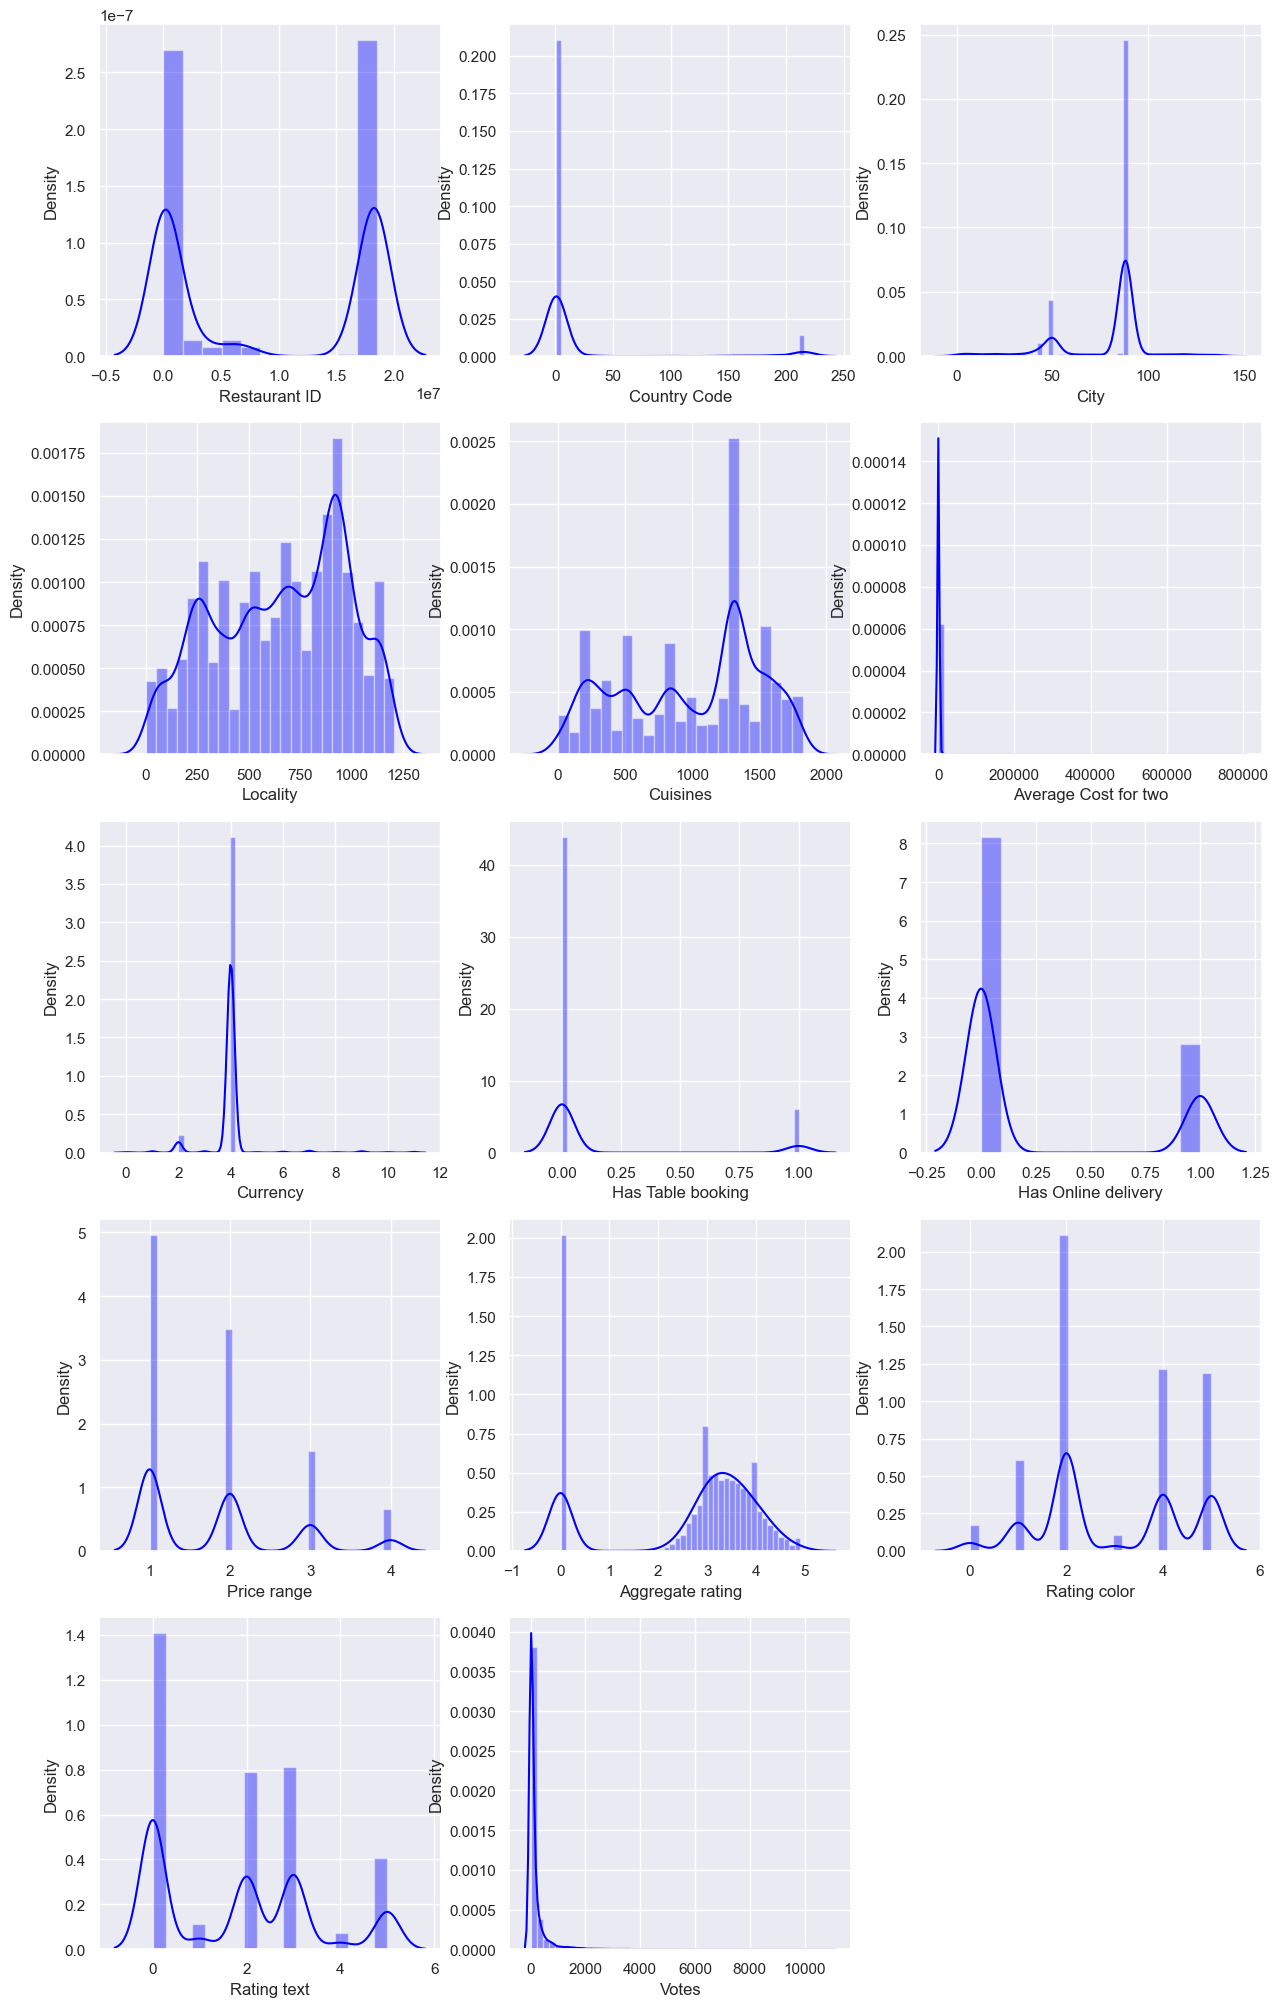

In [318]:
plt.figure(figsize=(15,25))
pltno=1
for column in data:
    if pltno<=14:
        plt.subplot(5,3,pltno)
        sns.distplot(data[column], color='blue')
        plt.xlabel(column, fontsize=12)
    pltno+=1
plt.show()

#### #Observations:
1. columns 'Votes' and 'Average Cost for two' having skewness on Right side

#### # Box plot

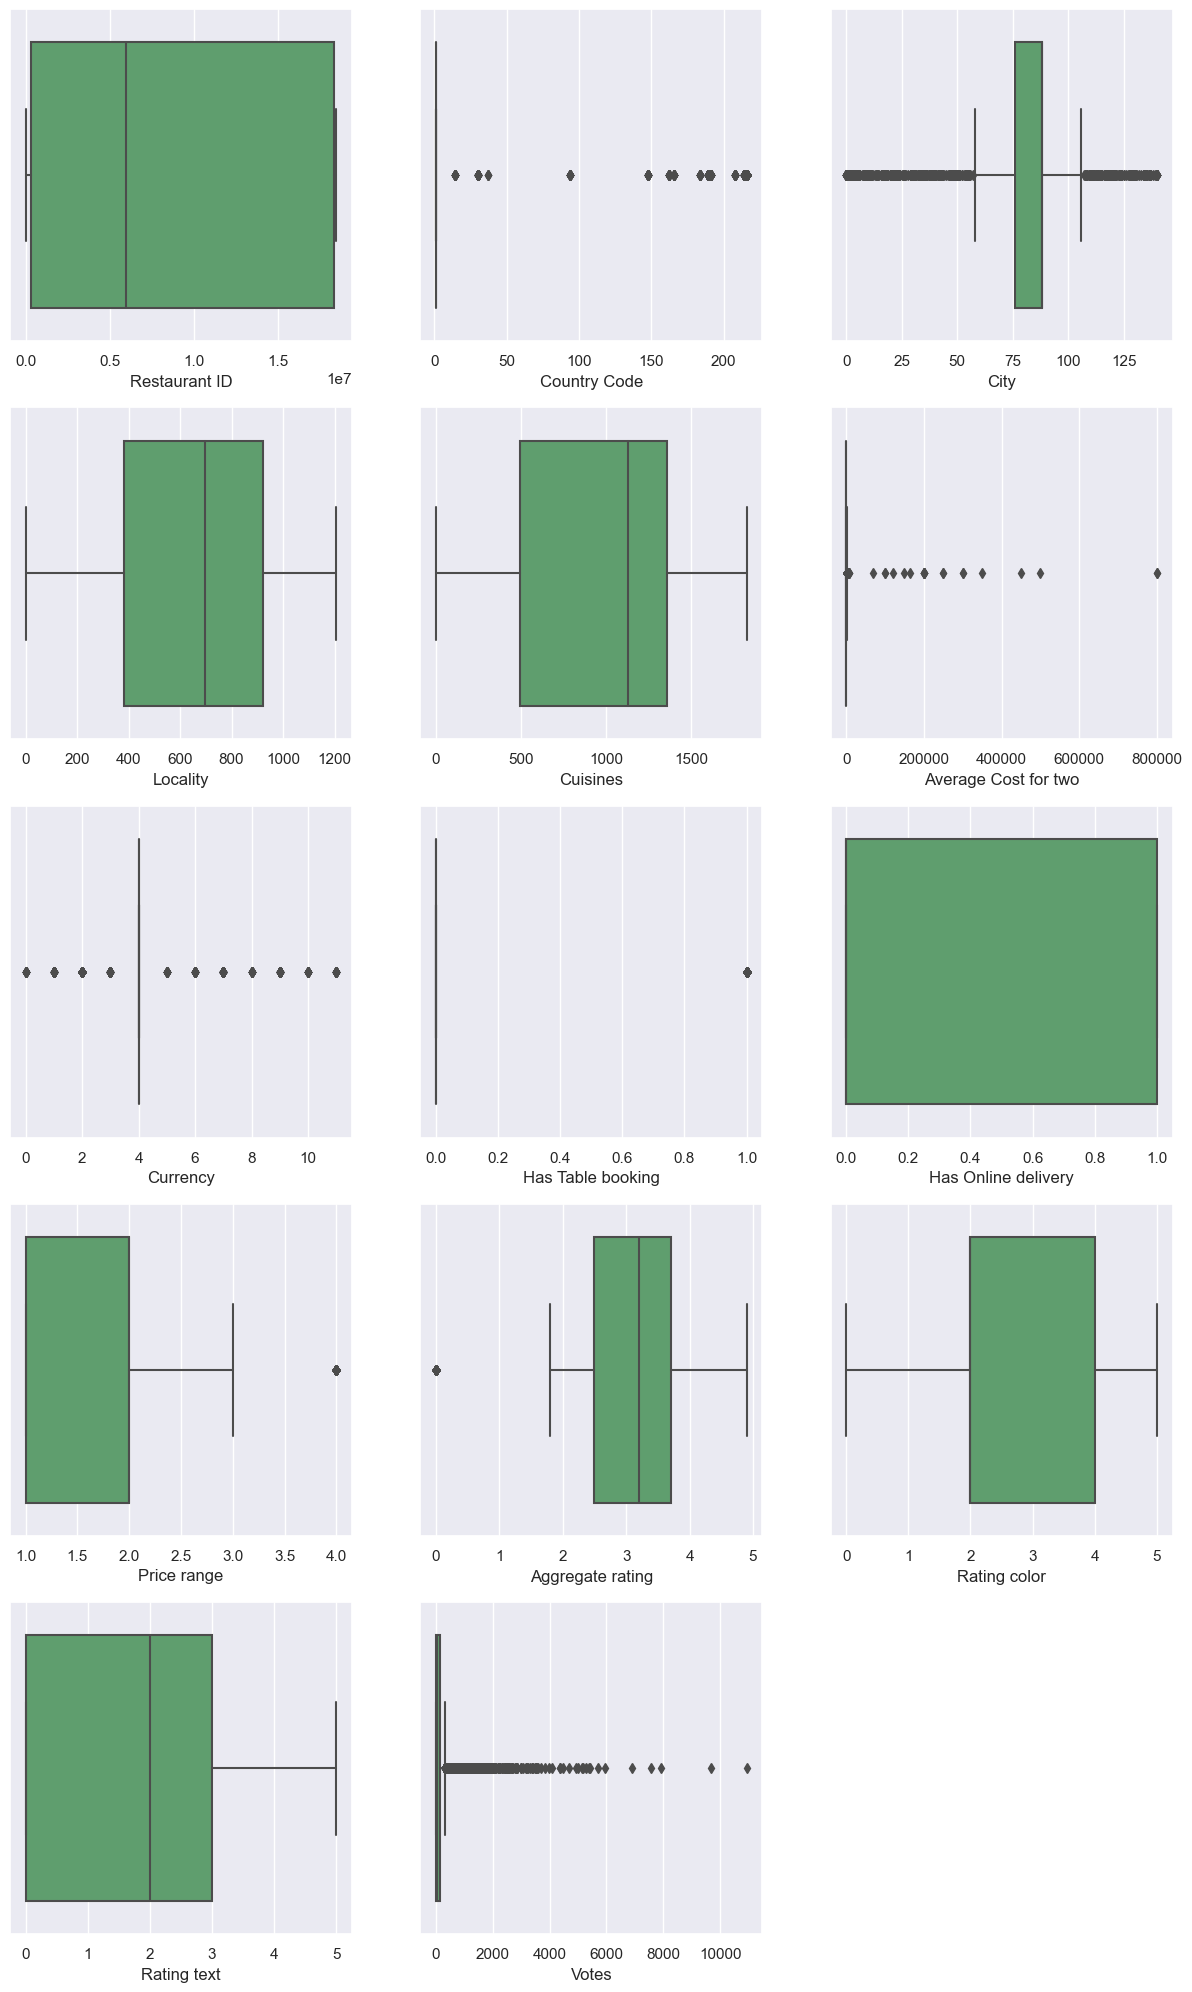

In [319]:
plt.figure(figsize=(15,25))
pltno=1
for column in data:
    if pltno<=14:
        plt.subplot(5,3,pltno)
        sns.boxplot(data[column], color='g')
        plt.xlabel(column, fontsize=12)
    pltno+=1
plt.show()

#### #Observations:
1. Max side skewness for columns - 'Country Code', 'Average Cost for two', 'Has Table booking', 'Price range' and 'Votes'
2. Min side skewness for columns - 'Aggregate rating'
3. Skewness on both side for columns - 'City' and 'Currency'

#### # Treating Skewness using Z-Score Method

In [320]:
# Z score method 
from scipy import stats

data1=data

comp=pd.DataFrame()
z = abs(stats.zscore(data1))


data1 = data1[(z < 3).all(axis=1)]

comp['new'] = data1.skew()
comp['old'] = data.skew()
print(data1.shape)
comp


(8508, 14)


,new,old
Restaurant ID,0.101494,0.061570
Country Code,11.899513,3.043965
City,-1.315604,-1.193777
Locality,-0.314710,-0.253554
Cuisines,-0.340132,-0.305484
Average Cost for two,3.708670,35.477915
Currency,-0.771475,2.858093
Has Table booking,2.288654,2.321100
Has Online delivery,0.997257,1.114620
Price range,1.041638,0.889618


In [321]:
data=data1
data.skew()

Restaurant ID            0.101494
Country Code            11.899513
City                    -1.315604
Locality                -0.314710
Cuisines                -0.340132
Average Cost for two     3.708670
Currency                -0.771475
Has Table booking        2.288654
Has Online delivery      0.997257
Price range              1.041638
Aggregate rating        -0.870112
Rating color             0.096022
Rating text              0.427850
Votes                    3.691596
dtype: float64

#### Observation:
Now data seems to be Ok to proceed further, the skewness in some columns are at higher side but these columns are containing categorical values so we can proceed as it is.

#### Re-Plotting dist plot

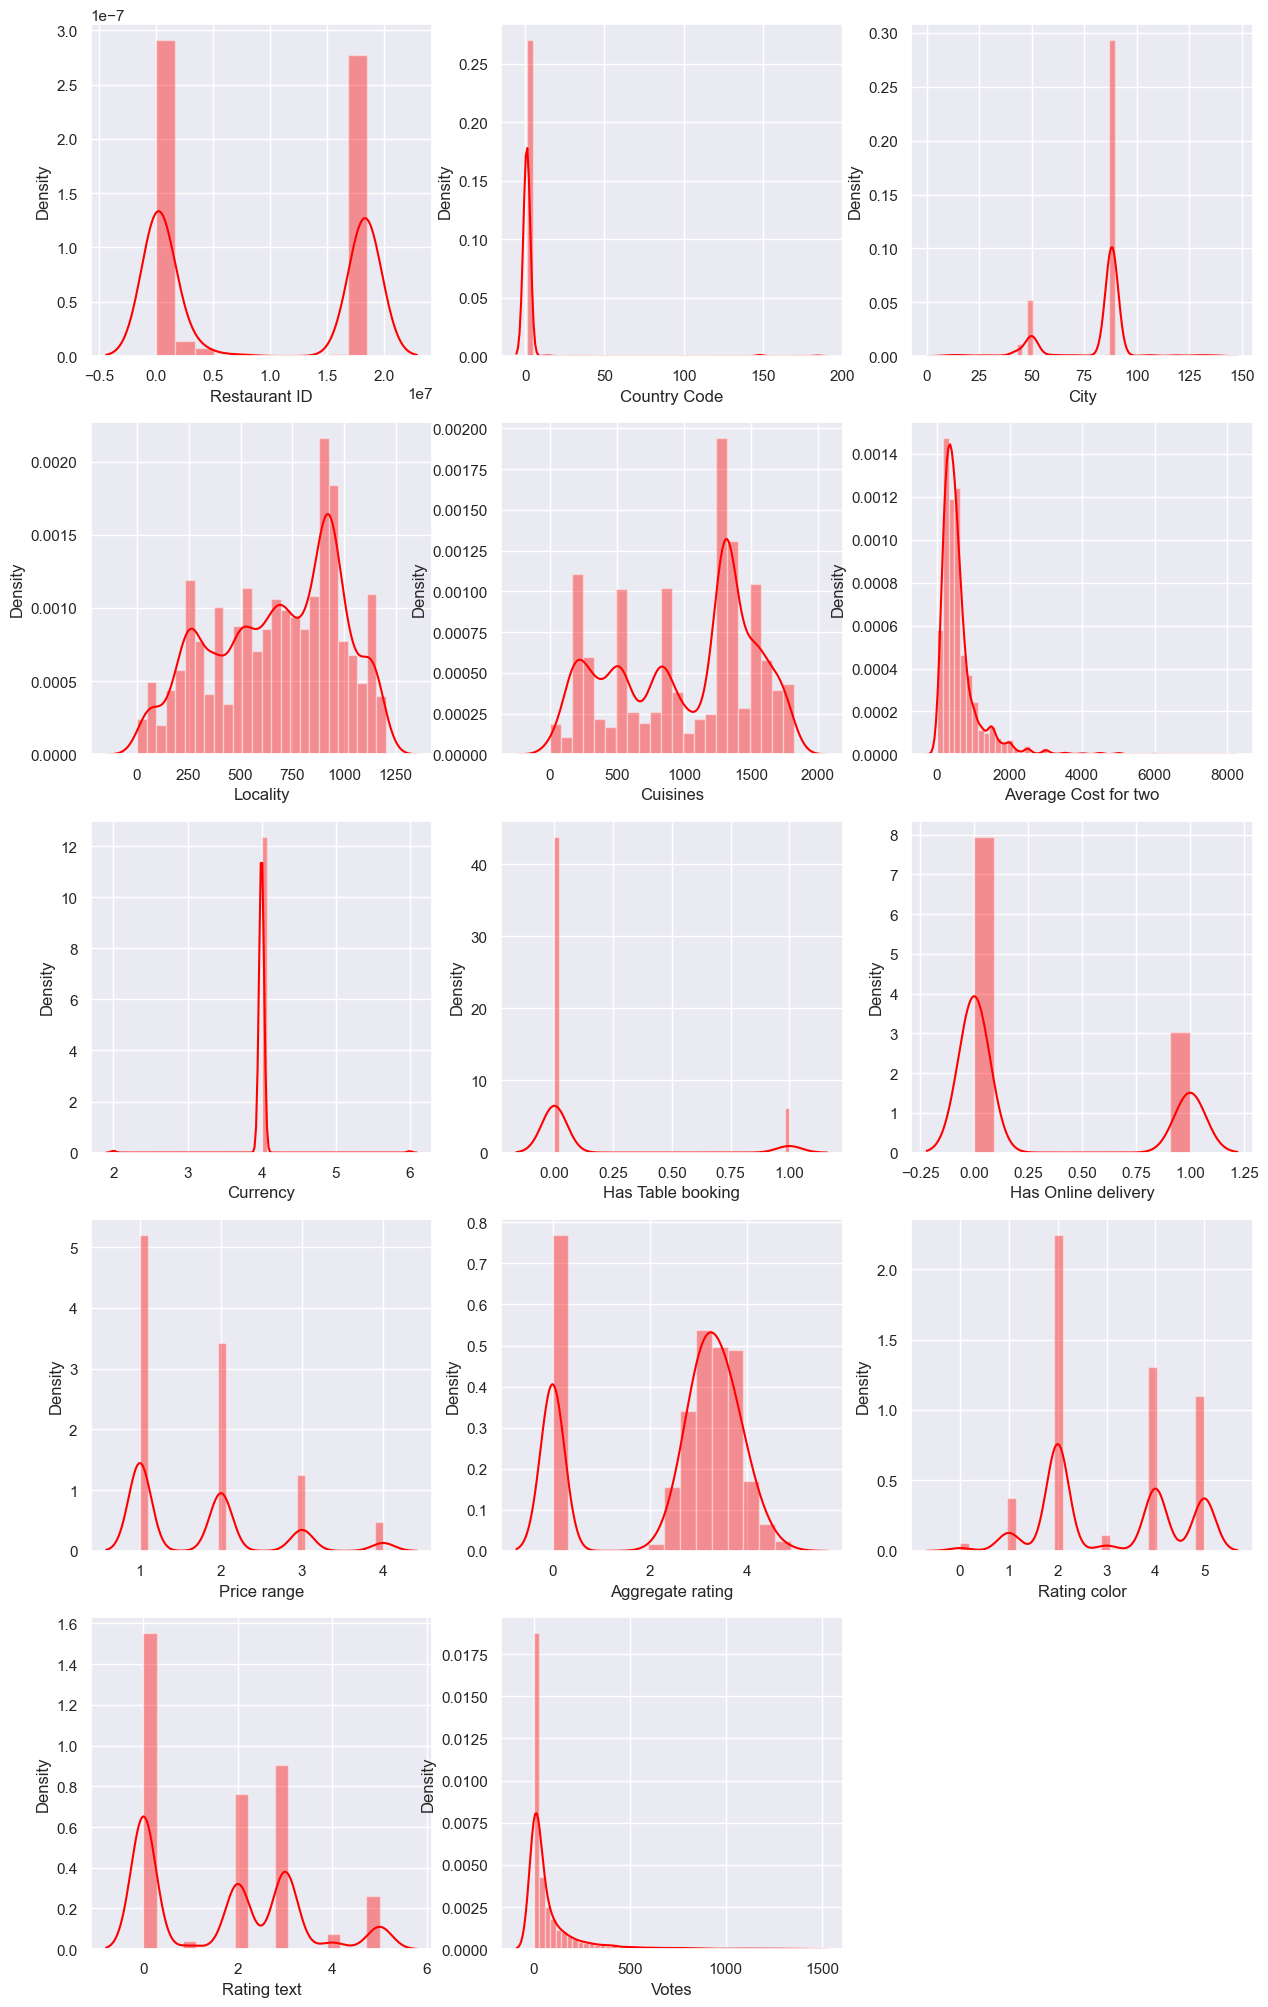

In [322]:
plt.figure(figsize=(15,25))
pltno=1
for column in data:
    if pltno<=14:
        plt.subplot(5,3,pltno)
        sns.distplot(data[column], color='red')
        plt.xlabel(column, fontsize=12)
    pltno+=1
plt.show()

#### #obervation:
dist plot also looks better

### # Multi-corelation heatmap

In [323]:
data.corr()

,Restaurant ID,Country Code,City,Locality,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Price range,Aggregate rating,Rating color,Rating text,Votes
Restaurant ID,1.000000,0.035573,-0.008296,0.090910,-0.057836,-0.142517,-0.054518,-0.092851,-0.063426,-0.141761,-0.380886,0.156557,0.276328,-0.240556
Country Code,0.035573,1.000000,0.043536,0.007011,-0.050650,-0.075511,0.154663,-0.032833,-0.054121,0.163552,0.086132,-0.079009,0.063032,0.032325
City,-0.008296,0.043536,1.000000,-0.026012,0.028566,-0.057093,-0.052833,-0.016090,-0.027493,-0.075241,-0.072553,0.067641,-0.036868,-0.088008
Locality,0.090910,0.007011,-0.026012,1.000000,-0.012447,-0.048817,0.036759,-0.073702,-0.050161,-0.092687,-0.147505,0.000875,0.003382,-0.146125
Cuisines,-0.057836,-0.050650,0.028566,-0.012447,1.000000,0.010218,0.012888,0.045285,-0.038452,0.011777,-0.055840,-0.046509,-0.064509,-0.025202
Average Cost for two,-0.142517,-0.075511,-0.057093,-0.048817,0.010218,1.000000,0.006364,0.620901,0.070700,0.805292,0.320895,-0.019210,0.085991,0.361295
Currency,-0.054518,0.154663,-0.052833,0.036759,0.012888,0.006364,1.000000,0.003055,0.005035,0.008158,0.013770,-0.073452,0.046507,0.042764
Has Table booking,-0.092851,-0.032833,-0.016090,-0.073702,0.045285,0.620901,0.003055,1.000000,0.082191,0.573881,0.214906,-0.012813,0.046940,0.306157
Has Online delivery,-0.063426,-0.054121,-0.027493,-0.050161,-0.038452,0.070700,0.005035,0.082191,1.000000,0.130781,0.293633,-0.018153,-0.061714,0.198539
Price range,-0.141761,0.163552,-0.075241,-0.092687,0.011777,0.805292,0.008158,0.573881,0.130781,1.000000,0.399905,-0.061691,0.099817,0.415548


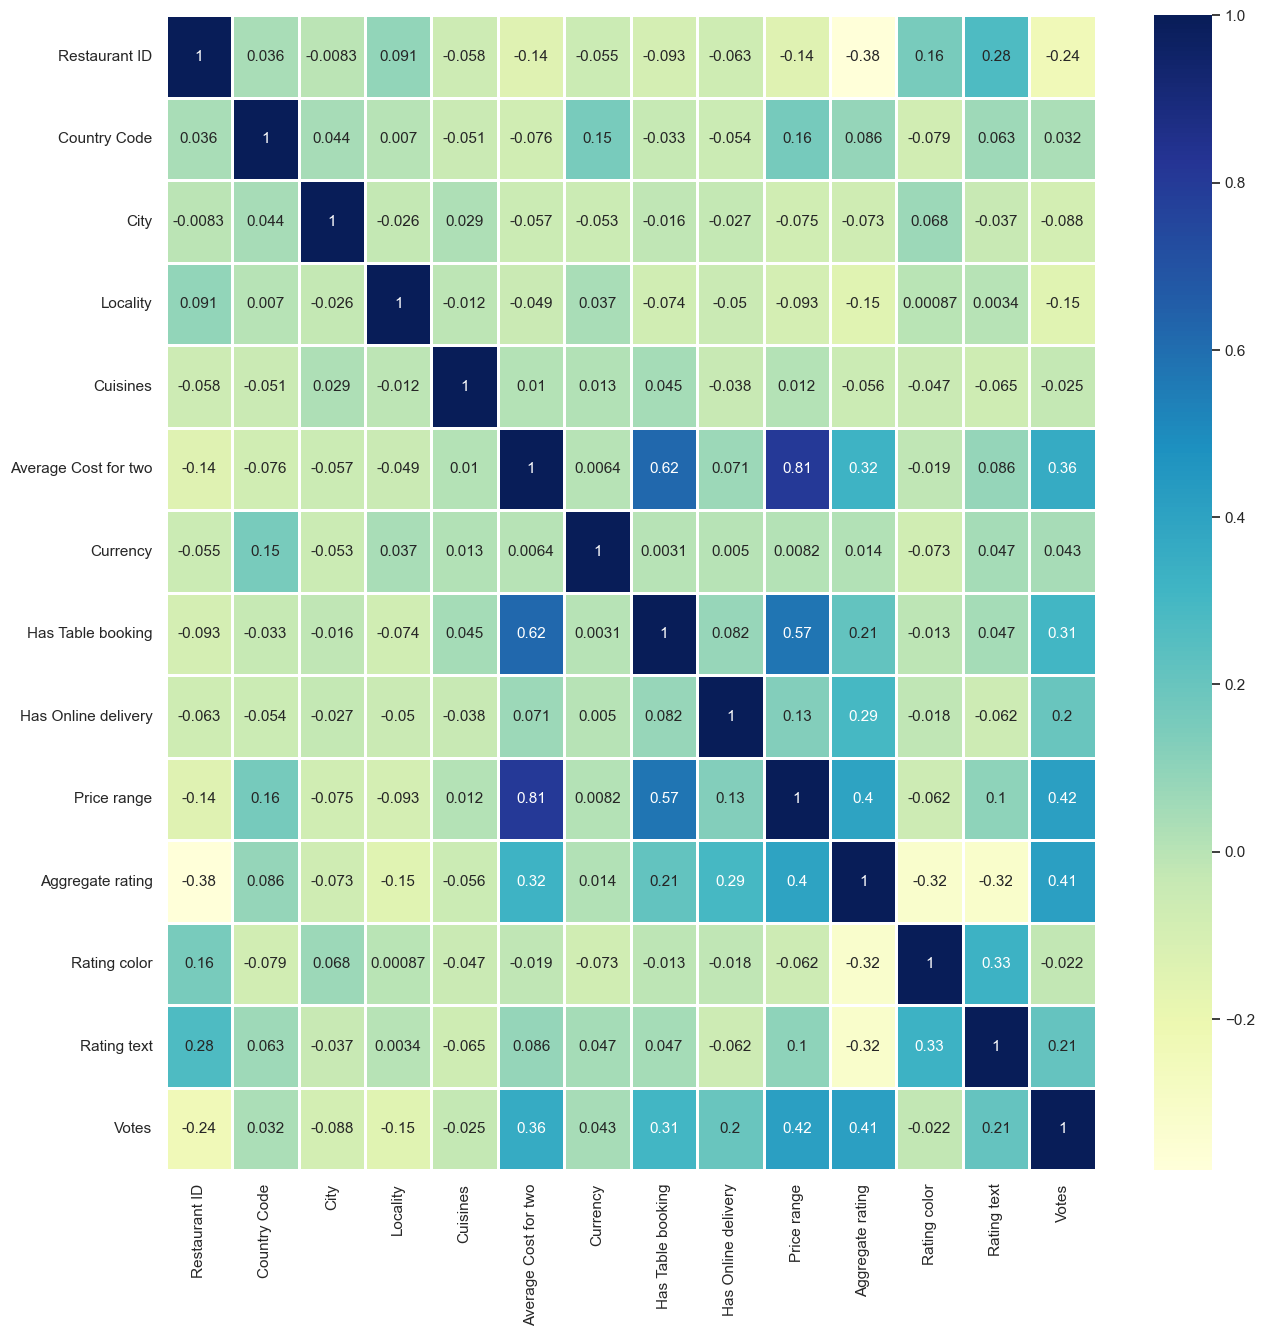

In [324]:
plt.subplots(figsize=(15,15))
sns.heatmap(data.corr(),cmap='YlGnBu',annot=True, linewidth=1, annot_kws={"size":11})
plt.show()

#### # Observation:
1. No multi co-linearity seen in the data set
2. Our both the Target columns - 'Average Cost for two' and 'Price range' are having 81% colinearity between them

#### # Checking our Target Columns - 'Average Cost for two' and 'Price range'

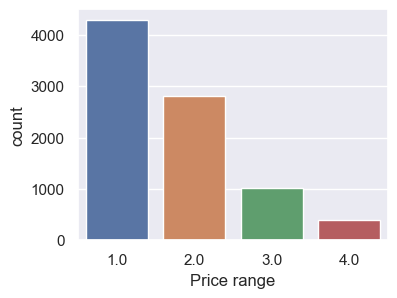

In [325]:
plt.figure(figsize=(4,3))
sns.countplot(data['Price range'])
plt.xlabel('Price range')
plt.show()

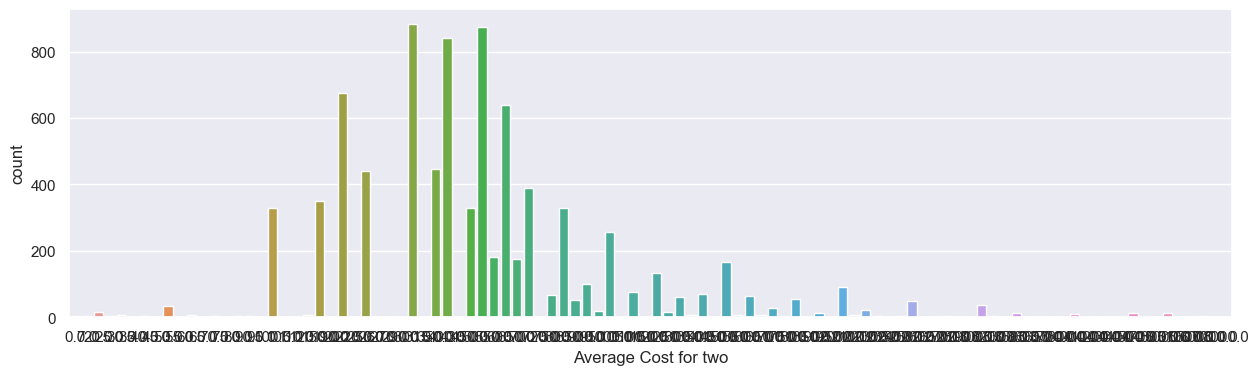

In [326]:
plt.figure(figsize=(15,4))
sns.countplot(data['Average Cost for two'])
plt.xlabel('Average Cost for two')
plt.show()

#### Observations:
1. The Target column - 'Average Cost for two' is having Continious data, so our problem is related to Regression
2. The Target column - 'Price range' is having Categorical data, so our problem is related to Classification
3. The Target column - 'Price range' is having imbalance in the data

### # Model buliding

### First taking 'Average Cost for two' as our Target column

In [327]:
X=data.drop(['Average Cost for two'], axis=1)
y=data['Average Cost for two']
X.head()

,Restaurant ID,Country Code,City,Locality,Cuisines,Currency,Has Table booking,Has Online delivery,Price range,Aggregate rating,Rating color,Rating text,Votes
143,16608864.0,14.0,12.0,93.0,1270.0,2.0,0.0,0.0,2.0,3.2,2.0,0.0,21.0
144,16604911.0,14.0,15.0,111.0,1619.0,2.0,0.0,0.0,2.0,4.6,0.0,1.0,237.0
185,16659169.0,37.0,25.0,181.0,1126.0,2.0,0.0,0.0,2.0,3.7,5.0,2.0,176.0
208,16643459.0,37.0,32.0,218.0,508.0,2.0,0.0,0.0,2.0,3.0,2.0,0.0,6.0
269,16615894.0,14.0,37.0,282.0,620.0,2.0,0.0,0.0,1.0,3.6,5.0,2.0,29.0


In [328]:
y.tail()

9332     40.0
9333     80.0
9334     70.0
9335    110.0
9336     90.0
Name: Average Cost for two, dtype: float64

#### #Standard scaler

In [329]:
scaler=StandardScaler()
X=pd.DataFrame(scaler.fit_transform(X) , columns=X.columns)
X.head()

,Restaurant ID,Country Code,City,Locality,Cuisines,Currency,Has Table booking,Has Online delivery,Price range,Aggregate rating,Rating color,Rating text,Votes
0,0.864412,0.881489,-3.751200,-1.909805,0.520295,-9.88123,-0.375422,-0.618842,0.344966,0.466191,-0.768281,-1.016501,-0.395683
1,0.863971,0.881489,-3.586849,-1.850756,1.212653,-9.88123,-0.375422,-0.618842,0.344966,1.393991,-2.211863,-0.395833,0.795505
2,0.870025,2.595775,-3.039014,-1.621120,0.234623,-9.88123,-0.375422,-0.618842,0.344966,0.797548,1.397091,0.224835,0.459105
3,0.868272,2.595775,-2.655529,-1.499740,-0.991386,-9.88123,-0.375422,-0.618842,0.344966,0.333648,-0.768281,-1.016501,-0.478404
4,0.865196,0.881489,-2.381611,-1.289787,-0.769196,-9.88123,-0.375422,-0.618842,-0.834211,0.731276,1.397091,0.224835,-0.351565


#### # Test train split

In [330]:
#importing libraries
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression


from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge,Lasso
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR

In [331]:
# Finding the best Random State
maxacc=0
maxrs=0
for i in range(0,500):
    x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=i)
    ln=LinearRegression()
    ln.fit(x_train,y_train)
    ln_pred=ln.predict(x_test)
    acc=r2_score(y_test,ln_pred)
    if acc > maxacc:
        maxacc=acc
        maxrs=i
print("Max R2 Score is :  ", maxacc, "And @ Random State :  ", maxrs)
    

Max R2 Score is :   0.7967944508685123 And @ Random State :   77


In [332]:
x_train,x_test,y_train,y_test=train_test_split(X ,y,test_size=0.25, random_state = maxrs)

In [333]:
# Linear Regression Model
ln=LinearRegression()
ln.fit(x_train,y_train)
ln_pred_test=ln.predict(x_test)
ln_pred_train=ln.predict(x_train)
print('R2 Score on Train data :  ',r2_score(y_train,ln_pred_train)*100,' %')
print('R2 Score on test data :  ',r2_score(y_test,ln_pred_test)*100,' %')
print('Mean Absolute Error :  ',mean_absolute_error(y_test,ln_pred_test))
print('Mean Squared Error :  ',mean_squared_error(y_test,ln_pred_test))
print('Root Mean Squared Error :  ',np.sqrt(mean_squared_error(y_test,ln_pred_test)))

R2 Score on Train data :   70.6967893740613  %
R2 Score on test data :   79.67944508685123  %
Mean Absolute Error :   159.7645861161939
Mean Squared Error :   56505.29758312959
Root Mean Squared Error :   237.70842976876017


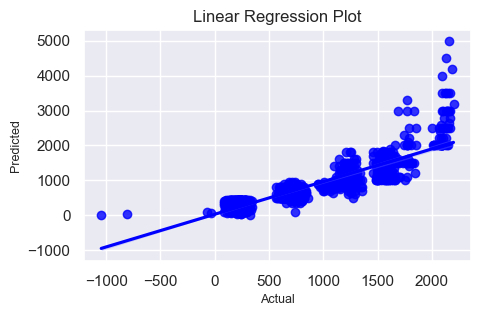

In [334]:
plt.figure(figsize=(5,3))
sns.regplot(x=ln_pred_test, y=y_test, color='blue')
plt.xlabel('Actual', fontsize=9)
plt.ylabel('Predicted', fontsize=9)
plt.title('Linear Regression Plot', fontsize=12)
plt.show()

In [335]:
# KNN model
knn=KNeighborsRegressor()
knn.fit(x_train,y_train)
knn_pred_test=knn.predict(x_test)
knn_pred_train=knn.predict(x_train)
print('R2 Score on Train data :  ',r2_score(y_train,knn_pred_train)*100,' %')
print('R2 Score on test data :  ',r2_score(y_test,knn_pred_test)*100,' %')
print('Mean Absolute Error :  ',mean_absolute_error(y_test,knn_pred_test))
print('Mean Squared Error :  ',mean_squared_error(y_test,knn_pred_test))
print('Root Mean Squared Error :  ',np.sqrt(mean_squared_error(y_test,knn_pred_test)))

R2 Score on Train data :   85.118314596161  %
R2 Score on test data :   79.91381624293659  %
Mean Absolute Error :   136.45416078984485
Mean Squared Error :   55853.58251057828
Root Mean Squared Error :   236.333625433577


In [336]:
# Random Forest Regressor model
RF=RandomForestRegressor()
RF.fit(x_train,y_train)
RF_pred_test=RF.predict(x_test)
RF_pred_train=RF.predict(x_train)
print('R2 Score on Train data :  ',r2_score(y_train,RF_pred_train)*100,' %')
print('R2 Score on test data :  ',r2_score(y_test,RF_pred_test)*100,' %')
print('Mean Absolute Error :  ',mean_absolute_error(y_test,RF_pred_test))
print('Mean Squared Error :  ',mean_squared_error(y_test,RF_pred_test))
print('Root Mean Squared Error :  ',np.sqrt(mean_squared_error(y_test,RF_pred_test)))

R2 Score on Train data :   98.19306716553267  %
R2 Score on test data :   86.77493265938892  %
Mean Absolute Error :   105.04318288669488
Mean Squared Error :   36774.89954541608
Root Mean Squared Error :   191.76782719063195


In [217]:
# Extra Trees Regressor model
et=ExtraTreesRegressor()
et.fit(x_train,y_train)
et_pred_test=et.predict(x_test)
et_pred_train=et.predict(x_train)
print('R2 Score on Train data :  ',r2_score(y_train,et_pred_train)*100,' %')
print('R2 Score on test data :  ',r2_score(y_test,et_pred_test)*100,' %')
print('Mean Absolute Error :  ',mean_absolute_error(y_test,et_pred_test))
print('Mean Squared Error :  ',mean_squared_error(y_test,et_pred_test))
print('Root Mean Squared Error :  ',np.sqrt(mean_squared_error(y_test,et_pred_test)))

R2 Score on Train data :   99.99976758470288  %
R2 Score on test data :   87.12103861763325  %
Mean Absolute Error :   107.3225669957687
Mean Squared Error :   35812.48389045604
Root Mean Squared Error :   189.24186611438822


In [218]:
# Decision Tree Regressor model
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)
dt_pred_test=dt.predict(x_test)
dt_pred_train=dt.predict(x_train)
print('R2 Score on Train data :  ',r2_score(y_train,dt_pred_train)*100,' %')
print('R2 Score on test data :  ',r2_score(y_test,dt_pred_test)*100,' %')
print('Mean Absolute Error :  ',mean_absolute_error(y_test,dt_pred_test))
print('Mean Squared Error :  ',mean_squared_error(y_test,dt_pred_test))
print('Root Mean Squared Error :  ',np.sqrt(mean_squared_error(y_test,dt_pred_test)))

R2 Score on Train data :   99.99994575819242  %
R2 Score on test data :   71.23002327617611  %
Mean Absolute Error :   134.36060178655384
Mean Squared Error :   80000.57592853784
Root Mean Squared Error :   282.8437305802231


In [219]:
# Ridge model
Ri=Ridge()
Ri.fit(x_train,y_train)
Ri_pred_test=Ri.predict(x_test)
Ri_pred_train=Ri.predict(x_train)
print('R2 Score on Train data :  ',r2_score(y_train,Ri_pred_train)*100,' %')
print('R2 Score on test data :  ',r2_score(y_test,Ri_pred_test)*100,' %')
print('Mean Absolute Error :  ',mean_absolute_error(y_test,Ri_pred_test))
print('Mean Squared Error :  ',mean_squared_error(y_test,Ri_pred_test))
print('Root Mean Squared Error :  ',np.sqrt(mean_squared_error(y_test,Ri_pred_test)))

R2 Score on Train data :   70.69678722475776  %
R2 Score on test data :   79.68162362482241  %
Mean Absolute Error :   159.73810296664578
Mean Squared Error :   56499.23973004029
Root Mean Squared Error :   237.69568723483454


In [220]:
# Gradient Boosting Regressor model
gb=GradientBoostingRegressor()
gb.fit(x_train,y_train)
gb_pred_test=gb.predict(x_test)
gb_pred_train=gb.predict(x_train)
print('R2 Score on Train data :  ',r2_score(y_train,gb_pred_train)*100,' %')
print('R2 Score on test data :  ',r2_score(y_test,gb_pred_test)*100,' %')
print('Mean Absolute Error :  ',mean_absolute_error(y_test,gb_pred_test))
print('Mean Squared Error :  ',mean_squared_error(y_test,gb_pred_test))
print('Root Mean Squared Error :  ',np.sqrt(mean_squared_error(y_test,gb_pred_test)))

R2 Score on Train data :   90.1145454836698  %
R2 Score on test data :   87.07442155733293  %
Mean Absolute Error :   110.90186155325141
Mean Squared Error :   35942.1117906772
Root Mean Squared Error :   189.5840494099575


In [221]:
# SVR model
svr=SVR()
svr.fit(x_train,y_train)
svr_pred_test=svr.predict(x_test)
svr_pred_train=svr.predict(x_train)
print('R2 Score on Train data :  ',r2_score(y_train,svr_pred_train)*100,' %')
print('R2 Score on test data :  ',r2_score(y_test,svr_pred_test)*100,' %')
print('Mean Absolute Error :  ',mean_absolute_error(y_test,svr_pred_test))
print('Mean Squared Error :  ',mean_squared_error(y_test,svr_pred_test))
print('Root Mean Squared Error :  ',np.sqrt(mean_squared_error(y_test,svr_pred_test)))


R2 Score on Train data :   29.023345654786304  %
R2 Score on test data :   35.44271835241668  %
Mean Absolute Error :   215.00353346911407
Mean Squared Error :   179514.21239457472
Root Mean Squared Error :   423.6911757336642


### # Cross validation score

In [222]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold


kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [224]:
#Linear Regression Model
score1=cross_val_score(ln,X,y,cv=kf,scoring='r2')
print('Score : ', score1)
print('Avg Score : ', score1.mean()*100, "%")
print('Difference between CV score and R2 Score is  : ', (r2_score(y_test,ln_pred_test) - score1.mean())*100, "%")

Score :  [0.74925569 0.72907067 0.72530209 0.69171904 0.72785725]
Avg Score :  72.46409478001567 %
Difference between CV score and R2 Score is  :  7.215350306835555 %


In [225]:
# KNN Model
score2=cross_val_score(knn,X,y,cv=kf,scoring='r2')
print('Score : ', score2)
print('Avg Score : ', score2.mean()*100, "%")
print('Difference between CV score and R2 Score is  : ', (r2_score(y_test,knn_pred_test) - score2.mean())*100, "%")

Score :  [0.80667445 0.74580497 0.78684078 0.78724254 0.75663997]
Avg Score :  77.66405430799979 %
Difference between CV score and R2 Score is  :  2.2497619349368003 %


In [226]:
# Random Forest Regressor model
score3=cross_val_score(RF,X,y,cv=kf,scoring='r2')
print('Score : ', score3)
print('Avg Score : ', score3.mean()*100, "%")
print('Difference between CV score and R2 Score is  : ', (r2_score(y_test,RF_pred_test) - score3.mean())*100, "%")

Score :  [0.86991526 0.84603959 0.91123789 0.88094445 0.86642268]
Avg Score :  87.49119731903983 %
Difference between CV score and R2 Score is  :  -0.23864283275105702 %


In [227]:
# Extra Trees Regressor model
score4=cross_val_score(et,X,y,cv=kf,scoring='r2')
print('Score : ', score4)
print('Avg Score : ', score4.mean()*100, "%")
print('Difference between CV score and R2 Score is  : ', (r2_score(y_test,et_pred_test) - score4.mean())*100, "%")

Score :  [0.83987597 0.83376979 0.87141463 0.87776551 0.8579007 ]
Avg Score :  85.61453207415288 %
Difference between CV score and R2 Score is  :  1.5065065434803793 %


In [228]:
# Decision Tree Regressor model
score5=cross_val_score(dt,X,y,cv=kf,scoring='r2')
print('Score : ', score5)
print('Avg Score : ', score5.mean()*100, "%")
print('Difference between CV score and R2 Score is  : ', (r2_score(y_test,dt_pred_test) - score5.mean())*100, "%")

Score :  [0.70876263 0.73494297 0.78381164 0.78877234 0.74893096]
Avg Score :  75.3044108300166 %
Difference between CV score and R2 Score is  :  -4.074387553840486 %


In [229]:
# Ridge model
score6=cross_val_score(Ri,X,y,cv=kf,scoring='r2')
print('Score : ', score6)
print('Avg Score : ', score6.mean()*100, "%")
print('Difference between CV score and R2 Score is  : ', (r2_score(y_test,Ri_pred_test) - score6.mean())*100, "%")

Score :  [0.74925982 0.7290772  0.72529581 0.69171846 0.72785546]
Avg Score :  72.46413491660113 %
Difference between CV score and R2 Score is  :  7.217488708221287 %


In [230]:
# Gradient Boosting Regressor model
score7=cross_val_score(gb,X,y,cv=kf,scoring='r2')
print('Score : ', score7)
print('Avg Score : ', score7.mean()*100, "%")
print('Difference between CV score and R2 Score is  : ', (r2_score(y_test,gb_pred_test) - score7.mean())*100, "%")

Score :  [0.8781262  0.83671214 0.88715579 0.85605737 0.86133048]
Avg Score :  86.38763935889632 %
Difference between CV score and R2 Score is  :  0.6867821984366085 %


In [231]:
# SVR model
score8=cross_val_score(svr,X,y,cv=kf,scoring='r2')
print('Score : ', score8)
print('Avg Score : ', score8.mean()*100, "%")
print('Difference between CV score and R2 Score is  : ', (r2_score(y_test,svr_pred_test) - score8.mean())*100, "%")

Score :  [0.31746998 0.32987739 0.31861976 0.2923234  0.31860858]
Avg Score :  31.537982316364456 %
Difference between CV score and R2 Score is  :  3.9047360360522254 %


#### # So our best performing model with Target Column as ' Average Cost for two ':
#### Random Forest Regressor model
  
R2 Score on Train data :   98.32 %  
R2 Score on test data :   87.25 %  
Mean Absolute Error :   104.07  
Mean Squared Error :   35446.77  
Root Mean Squared Error :   188.27  
  
Avg Score :  87.49 %  
Difference between CV score and R2 Score is  :  -0.23 %  

### # Hyper Parameter Tuning taking ' Average Cost for two ' as target column

In [234]:
from sklearn.model_selection import GridSearchCV

In [238]:
params={'criterion' : ['squared_error','absolute_error', 'friedman_mse', 'poisson'],
       'max_features': ['sqrt', 'log2', 1.0],
       'n_estimators' : [100,200,300],
       'min_samples_split': [2, 3, 5],
        'n_jobs' : [-2,-1,1, None]}



In [239]:
gscv=GridSearchCV(RF,params,cv=3)
gscv.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error',
                                       'friedman_mse', 'poisson'],
                         'max_features': ['sqrt', 'log2', 1.0],
                         'min_samples_split': [2, 3, 5],
                         'n_estimators': [100, 200, 300],
                         'n_jobs': [-2, -1, 1, None]})

In [240]:

print('Best Parameters : ', gscv.best_params_,'\n')
print('=' * 100,'\n')
print('Best Score : ', gscv.best_score_ )



Best Parameters :  {'criterion': 'squared_error', 'max_features': 1.0, 'min_samples_split': 3, 'n_estimators': 100, 'n_jobs': -1} 


Best Score :  0.8715856400457845


In [257]:
best_model_1=RandomForestRegressor(criterion = 'squared_error', max_features= 1.0,  min_samples_split= 3, n_estimators= 100, n_jobs= -1)
best_model_1.fit(x_train,y_train)
y_pred=best_model_1.predict(x_test)
print('R2 Score on test data :  ',r2_score(y_test,y_pred)*100,' %')

R2 Score on test data :   99.41741690078133  %


### # Saving model

In [258]:
import pickle
pickle.dump(best_model_1,open('Zomato_Restaurant_project_AvgPrice_of_two.pkl','wb'))

In [259]:
#load model
model_Avg_Price_of_two=pickle.load(open('Zomato_Restaurant_project_AvgPrice_of_two.pkl','rb'))

In [260]:
prediction_Avg_price_of_two = model_Avg_Price_of_two.predict(x_test)
prediction_Avg_price_of_two

array([2., 3., 1., ..., 4., 3., 4.])

In [261]:
df=pd.DataFrame()
df['Actual'] = y_test
df['predicted']=prediction_Avg_price_of_two

df

,Actual,predicted
9949,2.0,2.0
6650,3.0,3.0
5282,1.0,1.0
11822,3.0,3.0
16636,4.0,4.0
...,...,...
13429,4.0,4.0
11995,3.0,3.0
15654,4.0,4.0
3759,3.0,3.0


In [262]:
print('*' * 100)
print('*' * 100)
print('*' * 100)

****************************************************************************************************
****************************************************************************************************
****************************************************************************************************


### Now working with ' Price range ' as our Target Column

#### As our Target column 'Price range' is having imbalance in data, Using Oversampling Method we can remove the imbalance

In [337]:
from imblearn.over_sampling import SMOTE
X=data.drop(['Price range'], axis=1)
y=data['Price range']

sm=SMOTE()
x1,y1=sm.fit_resample(X,y)

In [338]:
y1.value_counts()

2.0    4283
1.0    4283
3.0    4283
4.0    4283
Name: Price range, dtype: int64

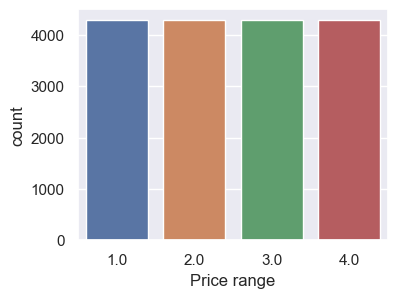

In [339]:
plt.figure(figsize=(4,3))
sns.set(font_scale=1)
sns.countplot(y1)
plt.xlabel('Price range', fontsize=12)
plt.show()

#### Now we are having equal samples 

In [340]:
X=x1
y2=y1
X.head()

,Restaurant ID,Country Code,City,Locality,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Aggregate rating,Rating color,Rating text,Votes
0,16608864.0,14.0,12.0,93.0,1270.0,20.0,2.0,0.0,0.0,3.2,2.0,0.0,21.0
1,16604911.0,14.0,15.0,111.0,1619.0,20.0,2.0,0.0,0.0,4.6,0.0,1.0,237.0
2,16659169.0,37.0,25.0,181.0,1126.0,25.0,2.0,0.0,0.0,3.7,5.0,2.0,176.0
3,16643459.0,37.0,32.0,218.0,508.0,25.0,2.0,0.0,0.0,3.0,2.0,0.0,6.0
4,16615894.0,14.0,37.0,282.0,620.0,7.0,2.0,0.0,0.0,3.6,5.0,2.0,29.0


#### #Test Train split

In [341]:
# Finding the best Random State
max_acc=0
rs=0
for i in range(50):
    x_train,x_test,y_train,y_test=train_test_split(X,y2,test_size=0.25,random_state=i)
    print('working at random state : ', i)
    rf=RandomForestClassifier()
    rf.fit(x_train,y_train)
    y_pred=rf.predict(x_test)
    accuracy=accuracy_score(y_test,y_pred)
    if accuracy > max_acc:
        max_acc=accuracy
        rs=i
print("Max accuracy score : ", max_acc, "   , at Random state : ", rs)

working at random state :  0
working at random state :  1
working at random state :  2
working at random state :  3
working at random state :  4
working at random state :  5
working at random state :  6
working at random state :  7
working at random state :  8
working at random state :  9
working at random state :  10
working at random state :  11
working at random state :  12
working at random state :  13
working at random state :  14
working at random state :  15
working at random state :  16
working at random state :  17
working at random state :  18
working at random state :  19
working at random state :  20
working at random state :  21
working at random state :  22
working at random state :  23
working at random state :  24
working at random state :  25
working at random state :  26
working at random state :  27
working at random state :  28
working at random state :  29
working at random state :  30
working at random state :  31
working at random state :  32
working at random st

In [342]:
x_train,x_test,y_train,y_test=train_test_split(X ,y2,test_size=0.25, random_state = maxrs)

In [343]:
# Random Forest Classifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
rfc_y_pred=rf.predict(x_test)
print("accuracy_score :", accuracy_score(y_test,rfc_y_pred)* 100,' %' )
print("\n confusion_matrix  : \n", confusion_matrix(y_test,rfc_y_pred))
print("\n classification_report  : \n", classification_report(y_test,rfc_y_pred))

accuracy_score : 99.18281578332943  %

 confusion_matrix  : 
 [[1041    3    1    0]
 [   9 1069    3    0]
 [   0   11 1085    6]
 [   0    0    2 1053]]

 classification_report  : 
               precision    recall  f1-score   support

         1.0       0.99      1.00      0.99      1045
         2.0       0.99      0.99      0.99      1081
         3.0       0.99      0.98      0.99      1102
         4.0       0.99      1.00      1.00      1055

    accuracy                           0.99      4283
   macro avg       0.99      0.99      0.99      4283
weighted avg       0.99      0.99      0.99      4283



In [270]:
#Support Vector Classifier
svc=SVC()
svc.fit(x_train, y_train)
svc_y_pred=svc.predict(x_test)
print("accuracy_score :", accuracy_score(y_test,svc_y_pred)* 100,' %')
print("\n confusion_matrix  : \n", confusion_matrix(y_test,svc_y_pred))
print("\n classification_report  : \n", classification_report(y_test,svc_y_pred))

accuracy_score : 30.936259631099695  %

 confusion_matrix  : 
 [[551   0   0 494]
 [439   0   0 642]
 [397   0   0 705]
 [281   0   0 774]]

 classification_report  : 
               precision    recall  f1-score   support

         1.0       0.33      0.53      0.41      1045
         2.0       0.00      0.00      0.00      1081
         3.0       0.00      0.00      0.00      1102
         4.0       0.30      0.73      0.42      1055

    accuracy                           0.31      4283
   macro avg       0.16      0.32      0.21      4283
weighted avg       0.15      0.31      0.20      4283



In [271]:
#Gradient Boosting Classifier
gb=GradientBoostingClassifier()
gb.fit(x_train, y_train)
gb_y_pred=gb.predict(x_test)
print("accuracy_score :", accuracy_score(y_test,gb_y_pred)* 100,' %')
print("\n confusion_matrix  : \n", confusion_matrix(y_test,gb_y_pred))
print("\n classification_report  : \n", classification_report(y_test,gb_y_pred))

accuracy_score : 98.41232780761149  %

 confusion_matrix  : 
 [[1042    3    0    0]
 [  12 1067    2    0]
 [   0   16 1068   18]
 [   0    0   17 1038]]

 classification_report  : 
               precision    recall  f1-score   support

         1.0       0.99      1.00      0.99      1045
         2.0       0.98      0.99      0.98      1081
         3.0       0.98      0.97      0.98      1102
         4.0       0.98      0.98      0.98      1055

    accuracy                           0.98      4283
   macro avg       0.98      0.98      0.98      4283
weighted avg       0.98      0.98      0.98      4283



In [272]:
#AdaBoost Classifier
ab=AdaBoostClassifier()
ab.fit(x_train, y_train)
ab_y_pred=ab.predict(x_test)
print("accuracy_score :", accuracy_score(y_test,ab_y_pred)* 100,' %')
print("\n confusion_matrix  : \n", confusion_matrix(y_test,ab_y_pred))
print("\n classification_report  : \n", classification_report(y_test,ab_y_pred))

accuracy_score : 51.435909409292556  %

 confusion_matrix  : 
 [[1044    1    0    0]
 [  19 1062    0    0]
 [   0 1074    3   25]
 [   0  945   16   94]]

 classification_report  : 
               precision    recall  f1-score   support

         1.0       0.98      1.00      0.99      1045
         2.0       0.34      0.98      0.51      1081
         3.0       0.16      0.00      0.01      1102
         4.0       0.79      0.09      0.16      1055

    accuracy                           0.51      4283
   macro avg       0.57      0.52      0.42      4283
weighted avg       0.56      0.51      0.41      4283



In [273]:
#Bagging Classifier
bag=BaggingClassifier()
bag.fit(x_train,y_train)
bag_y_pred=bag.predict(x_test)
print("accuracy_score :", accuracy_score(y_test,bag_y_pred)* 100,' %')
print("\n confusion_matrix  : \n", confusion_matrix(y_test,bag_y_pred))
print("\n classification_report  : \n", classification_report(y_test,bag_y_pred))

accuracy_score : 98.92598645809012  %

 confusion_matrix  : 
 [[1042    3    0    0]
 [  10 1063    8    0]
 [   0    8 1089    5]
 [   0    1   11 1043]]

 classification_report  : 
               precision    recall  f1-score   support

         1.0       0.99      1.00      0.99      1045
         2.0       0.99      0.98      0.99      1081
         3.0       0.98      0.99      0.99      1102
         4.0       1.00      0.99      0.99      1055

    accuracy                           0.99      4283
   macro avg       0.99      0.99      0.99      4283
weighted avg       0.99      0.99      0.99      4283



In [274]:
#Extra Trees Classifier
et=ExtraTreesClassifier()
et.fit(x_train,y_train)
et_y_pred=et.predict(x_test)
print("accuracy_score :", accuracy_score(y_test,et_y_pred)* 100,' %')
print("\n confusion_matrix  : \n", confusion_matrix(y_test,et_y_pred))
print("\n classification_report  : \n", classification_report(y_test,et_y_pred))


accuracy_score : 98.5057202895167  %

 confusion_matrix  : 
 [[1029   15    1    0]
 [   7 1055   19    0]
 [   0    9 1084    9]
 [   0    0    4 1051]]

 classification_report  : 
               precision    recall  f1-score   support

         1.0       0.99      0.98      0.99      1045
         2.0       0.98      0.98      0.98      1081
         3.0       0.98      0.98      0.98      1102
         4.0       0.99      1.00      0.99      1055

    accuracy                           0.99      4283
   macro avg       0.99      0.99      0.99      4283
weighted avg       0.99      0.99      0.99      4283



### # Cross Validation Score

In [275]:
from sklearn.model_selection import cross_val_score

In [277]:
#Cross validation for Random forest classifier
cv_score = cross_val_score(rf,X,y2,cv=5,scoring='accuracy')
print(cv_score, '\n')
print('Average CV Score', cv_score.mean()*100,'  %')
print('difference in score Random forest classifier : ', (accuracy_score(y_test,rfc_y_pred)-cv_score.mean()))

[0.94134812 0.99474759 0.99474606 0.98423818 0.99095155] 

Average CV Score 98.12062991412415   %
difference in score Random forest classifier :  0.01015489628252697


In [278]:
#Cross validation for support vector classifier
cv_score = cross_val_score(svc,X,y2,cv=5,scoring='accuracy')
print(cv_score, '\n')
print('Average CV Score', cv_score.mean()*100,'  %')
print('difference in score support vector classifier : ', (accuracy_score(y_test,svc_y_pred)-cv_score.mean()))

[0.31981325 0.30580683 0.31115003 0.31348511 0.34179802] 

Average CV Score 31.84106468140182   %
difference in score support vector classifier :  -0.009048050503021265


In [280]:
#Cross validation for Gradient Boosting classifier
cv_score = cross_val_score(gb,X,y2,cv=5,scoring='accuracy')
print(cv_score, '\n')
print('Average CV Score', cv_score.mean()*100,'  %')
print('difference in score Gradient Boosting classifier :  ', (accuracy_score(y_test,gb_y_pred)-cv_score.mean()))

[0.83221477 0.98657718 0.98832458 0.9757735  0.98540572] 

Average CV Score 95.36591481642552   %
difference in score Gradient Boosting classifier :   0.03046412991185976


In [281]:
#Cross validation for AdaBoost classifier
cv_score = cross_val_score(ab,X,y2,cv=5,scoring='accuracy')
print(cv_score, '\n')
print('Average CV Score', cv_score.mean()*100,'  %')
print('difference in score AdaBoost classifier : ', (accuracy_score(y_test,ab_y_pred)-cv_score.mean()))

[0.73971404 0.51882113 0.92586106 0.69994162 0.77203736] 

Average CV Score 73.1275041730184   %
difference in score AdaBoost classifier :  -0.2169159476372583


In [282]:
#Cross validation for Bagging classifier
cv_score = cross_val_score(bag,X,y2,cv=5,scoring='accuracy')
print(cv_score, '\n')
print('Average CV Score', cv_score.mean()*100,'  %')
print('difference in score Bagging classifier : ', (accuracy_score(y_test,bag_y_pred)-cv_score.mean()))

[0.79369711 0.99007879 0.99328663 0.97810858 0.98803269] 

Average CV Score 94.86407603095572   %
difference in score Bagging classifier :  0.040619104271344075


In [283]:
#Cross validation for Extratree classifier
cv_score = cross_val_score(et,X,y2,cv=5,scoring='accuracy')
print(cv_score, '\n')
print('Average CV Score', cv_score.mean()*100,'  %')
print('difference in score Extratree classifier : ', (accuracy_score(y_test,et_y_pred)-cv_score.mean()))

[0.79019551 0.97811497 0.98540572 0.98248687 0.97314653] 

Average CV Score 94.18699176604999   %
difference in score Extratree classifier :  0.04318728523466708


#### # So our best performing model with Target column as ' Price range ' is:
#### Random forest classifier 
  
accuracy_score : 99.13 %   
   
Average CV Score 98.12 %  
difference in score Random forest classifier :  1.015 %  

### So we have Random forest classifier Model as Final model

### # Hyper Parameter Tuning taking ' Price range ' as target column

In [285]:
from sklearn.model_selection import GridSearchCV

In [286]:
params={'criterion' : ['gini', 'entropy', 'log_loss'],
       'max_features': ['sqrt', 'log2', None],
       'n_estimators' : [100,200,300],
       'min_samples_split': [2, 5],
        'min_samples_leaf' : [1, 4],
        'n_jobs' : [-2,-1,1, None]}

In [287]:
gscv=GridSearchCV(rf,params,cv=3)
gscv.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1, 4],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200, 300],
                         'n_jobs': [-2, -1, 1, None]})

In [288]:
print('Best Parameters : ', gscv.best_params_)
print('=' * 100,'\n')
print('Best Score : ', gscv.best_score_ )

Best Parameters :  {'criterion': 'entropy', 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300, 'n_jobs': None}

Best Score :  0.9915946766285314


In [344]:
best_model_2=RandomForestClassifier(criterion = 'entropy', max_features= 'sqrt', min_samples_leaf= 1, min_samples_split= 2, n_estimators= 300, n_jobs= None)
best_model_2.fit(x_train,y_train)
y2_pred=best_model_2.predict(x_test)
print('R2 Score on test data :  ',r2_score(y_test,y2_pred)*100,' %')


R2 Score on test data :   99.20312650339072  %


### # Confusion Metrics

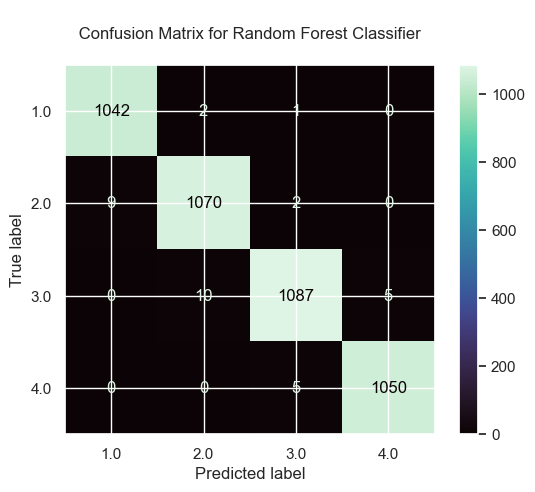

In [346]:
from sklearn import metrics

class_names = data.columns
metrics.plot_confusion_matrix(best_model_2.fit(x_train,y_train), x_test, y_test, cmap='mako')
plt.title('\n Confusion Matrix for Random Forest Classifier \n')
plt.show()

### # Saving model

In [347]:
#save model
import pickle
pickle.dump(best_model_2,open('Zomato_Restaurant_project_Price_Range.pkl','wb'))

In [348]:
#load model
model_Price_Range=pickle.load(open('Zomato_Restaurant_project_Price_Range.pkl','rb'))

In [349]:
prediction_Price_range = model_Price_Range.predict(x_test)
prediction_Price_range

array([2., 3., 1., ..., 4., 3., 4.])

In [350]:
df=pd.DataFrame()
df['Actual'] = y_test
df['predicted']=prediction_Price_range

df.sample(10)

,Actual,predicted
8201,1.0,1.0
10227,3.0,3.0
6245,2.0,2.0
5773,1.0,1.0
10943,3.0,3.0
7790,1.0,1.0
2616,2.0,2.0
4605,1.0,1.0
1318,1.0,1.0
16591,4.0,4.0


### Comments

The Project is sucessfully pridicting the Average Price for Two by Random Forest Regressor model with the accuracy of 99.41%

The Project is sucessfully pridicting the Price Range by Random Forest Classifier model with the accuracy of 99.20%